<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/04%20Deep%20Learning/notebooks/05-CNN-0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolutional Neural Networks

En esta notebook implementamos un ejemplo sencillo de una red CNN para el dataset de Fashion MNIST.

In [72]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train.shape

(60000, 28, 28)

In [73]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [75]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [76]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [108]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=16,kernel_size=3,activation='relu',
                padding="same", strides=1,
                 input_shape=(x_train.shape[1], x_train.shape[2], 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 flatten_16 (Flatten)        (None, 3136)              0         
                                                                 
 dense_27 (Dense)            (None, 50)                156850    
                                                                 
 dense_28 (Dense)            (None, 10)                510       
                                                                 
Total params: 157520 (615.31 KB)
Trainable params: 157520 (615.31 KB)
Non-trainable params: 0 (0.00 Byte)
_____________

In [109]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [110]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [111]:
history = model.fit(x_train, y_train, epochs=30, validation_split=0.2,callbacks=[early_stopping])

Epoch 1/30
1500/1500 [==============================] - 21s 14ms/step - loss: 0.4385 - accuracy: 0.8470 - val_loss: 0.3424 - val_accuracy: 0.8808
Epoch 2/30
1500/1500 [==============================] - 24s 16ms/step - loss: 0.3017 - accuracy: 0.8935 - val_loss: 0.2955 - val_accuracy: 0.8899
Epoch 3/30
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2590 - accuracy: 0.9058 - val_loss: 0.2623 - val_accuracy: 0.9027
Epoch 4/30
1500/1500 [==============================] - 26s 17ms/step - loss: 0.2305 - accuracy: 0.9152 - val_loss: 0.2626 - val_accuracy: 0.9047
Epoch 5/30
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2075 - accuracy: 0.9254 - val_loss: 0.2513 - val_accuracy: 0.9107
Epoch 6/30
1500/1500 [==============================] - 22s 14ms/step - loss: 0.1898 - accuracy: 0.9309 - val_loss: 0.2476 - val_accuracy: 0.9112
Epoch 7/30
1500/1500 [==============================] - 23s 15ms/step - loss: 0.1730 - accuracy: 0.9358 - val_loss: 0.2690 -

In [106]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2813 - accuracy: 0.9074


[0.2813355028629303, 0.9074000120162964]

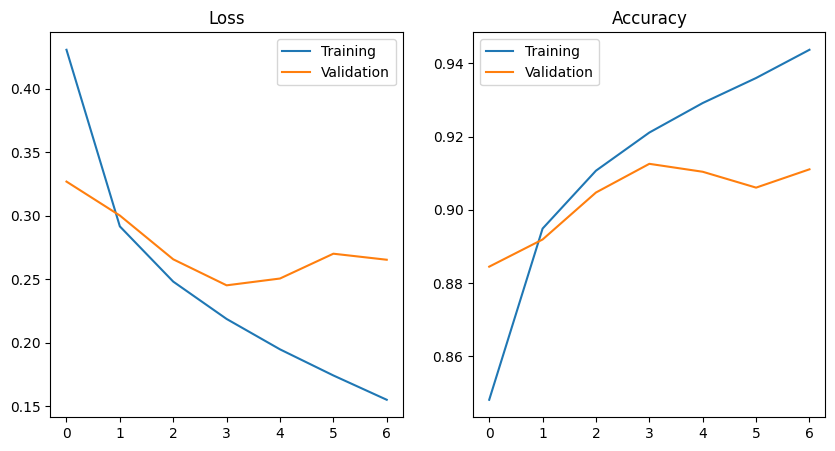

In [107]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(history.history['loss'],label='Training')
axs[0].plot(history.history['val_loss'],label='Validation')
axs[0].set_title('Loss')
axs[0].legend()
axs[1].plot(history.history['accuracy'],label='Training')
axs[1].plot(history.history['val_accuracy'],label='Validation')
axs[1].set_title('Accuracy')
axs[1].legend()
fig.show()

⭕ Práctica

Usando el mismo dataset, implementa una red CNN con dos capas convolucionales, en lugar de uno. La segunda capa tendrá las siguientes especificaciones:

* Una capa convolucional 2D de 8 filtros, el resto de hiperparámetros serán los mismos.
* Una capa de MaxPooling.

Además, agrega una segunda capa densa oculta, con 16 neuronas.